In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pickle

#### 1. Data Overview

In [16]:
dataset = pd.read_csv('breast-cancer.csv')
dataset.shape

(569, 32)

In [17]:
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [18]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
dataset.duplicated().sum()
dataset.drop_duplicates(inplace=True)

diagnosis
B    357
M    212
Name: count, dtype: int64


Text(0.5, 1.0, 'Diagnosis count')

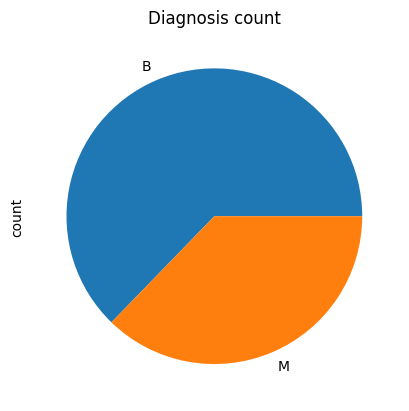

In [20]:
# M - Malignant: Ác tính
# B - Benign : Lành tính
print(dataset.diagnosis.value_counts())
dataset['diagnosis'].value_counts().plot(kind='pie').set_title('Diagnosis count')

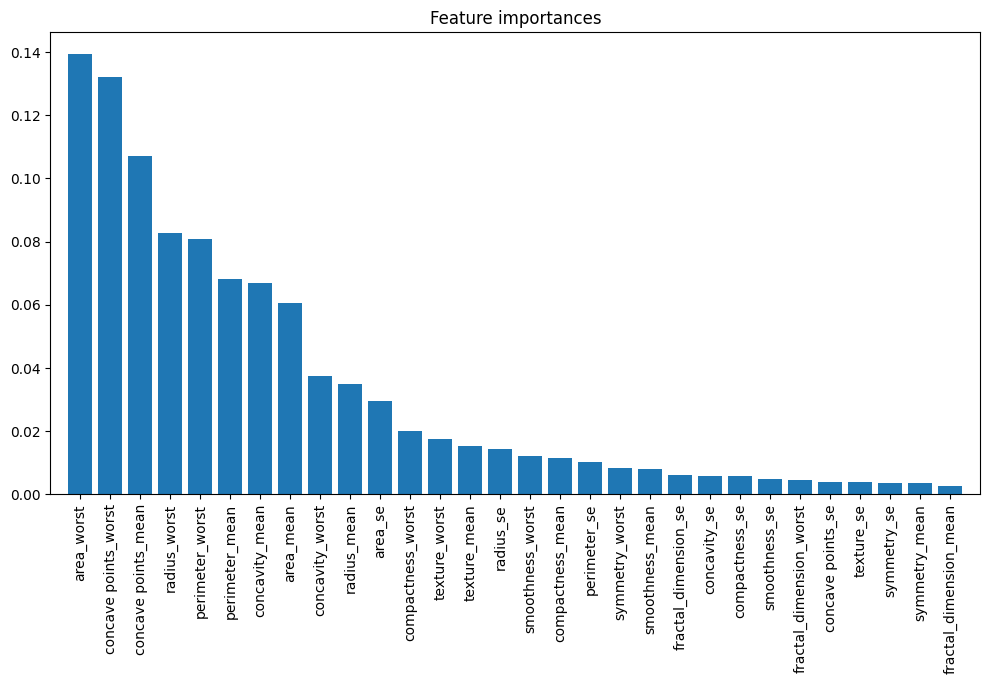

In [21]:
# Tách dữ liệu thành các đặc trưng (X) và nhãn (y)
X = dataset.drop(columns=['id', 'diagnosis'])
y = dataset['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Khởi tạo mô hình RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Lấy độ quan trọng của các đặc trưng
importances = model.feature_importances_

# Sắp xếp độ quan trọng của các đặc trưng
indices = np.argsort(importances)[::-1]

# Vẽ biểu đồ độ quan trọng của các đặc trưng
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [22]:
# Chọn ra 5 đặc trưng quan trọng nhất:
# area_worst: Giá trị lớn nhất (tệ nhất) của diện tích đo được từ các hình ảnh chụp tế bào học của khối u.
# concave points_worst : giá trị lớn nhất của các điểm lõm trên đường viền của khối u.
# concave points_mean:  Giá trị trung bình của các điểm lõm trên đường viền khối u.
# radius_worst: Giá trị lớn nhất của bán kính đo được của khối u.
# perimeter_worst: Giá trị lớn nhất của chu vi đo được của khối u.

newdf =pd.DataFrame(dataset[ ['diagnosis','area_worst', 'concave points_worst', 'concave points_mean', 'radius_worst', 'perimeter_worst']])
newdf.head()

,diagnosis,area_worst,concave points_worst,concave points_mean,radius_worst,perimeter_worst
0,M,2019.0,0.2654,0.14710,25.38,184.60
1,M,1956.0,0.1860,0.07017,24.99,158.80
2,M,1709.0,0.2430,0.12790,23.57,152.50
3,M,567.7,0.2575,0.10520,14.91,98.87
4,M,1575.0,0.1625,0.10430,22.54,152.20


In [30]:
X = newdf.iloc[:, 1:]
y = newdf['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Naive Bayes Accuracy: 0.93
Random Forest Accuracy: 0.96
SVM Accuracy: 0.96


In [ ]:
#Pipelines tổ chức các bước xử lý thành một chuỗi làm việc tự động
pipelines = {
    'Naive Bayes': Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', MultinomialNB())
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier(random_state=42))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVC(probability=True, random_state=42))
    ])
}

# Hyperparameter tuning for Random Forest and SVM
param_grids = {
    'Random Forest': {
        'model__n_estimators': [50, 100, 200], # Số cây trong rừng
        'model__max_depth': [None, 10, 20, 30] # Độ sâu tối đa của cây
    },
    'SVM': {
        'model__C': [0.1, 1, 10], #Tham số Margin
        'model__kernel': ['linear', 'rbf'] # 2 loại Kernel: tuyến tính và Gaussian RBF
    }
}

# Train and evaluate models
for name, pipeline in pipelines.items():
    if name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        pipeline.fit(X_train, y_train)
        best_model = pipeline
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

    if name in param_grids:
        print(f"Best parameters for {name}: {grid_search.best_params_}")



Naive Bayes Accuracy: 0.62
Random Forest Accuracy: 0.96
Best parameters for Random Forest: {'model__max_depth': None, 'model__n_estimators': 50}
SVM Accuracy: 0.96
Best parameters for SVM: {'model__C': 1, 'model__kernel': 'rbf'}


In [27]:
# Chọn model có độ chính xác cao nhất

best_model_name = max(models, key=lambda name: accuracy_score(y_test, models[name].predict(X_test)))
model = models[best_model_name]
print(f"Best model: {best_model_name}")

Best model: Random Forest


In [28]:
pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))